# Description 1

Mtcars, the automobile company in the United States have planned to rework on optimizing the horsepower of their cars, as most of the customer feedbacks were centered around horsepower. However, while developing an ML model with respect to horsepower, the efficiency of the model was compromised. Irregularity might be one of the causes.

# Objective 1

Check for missing values and outliers within the horsepower column and remove them.

# Description 2

Mtcars, an automobile company in Chambersburg, United States, has recorded the production of its cars within a dataset. The company is coming up with a new model based on the feedback given by its customers. It has to explore the current dataset to derive further insights from it.

# Objective 2

Import the dataset, explore for dimensionality, and type and average value of the horsepower across all the cars. Also, identify a few of mostly correlated features, which would help
in modification.

## Importing the Libraries

In [2]:
import pandas as pd
import numpy as np

In [3]:
mt_data=pd.read_csv('mtcars.csv')

In [4]:
mt_data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [24]:
mt_data.shape

(32, 12)

In [6]:
mt_data.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


Here We can see the column hp relates to **Horse Power **

### Finding the Missing Values in the dataset "mt_data"

We see there are 32 null values in hp but there is one problem so what we will do is we will create a seperate dataframe containg only hoursepower data so that we donot distrub the original data  

In [12]:
Horse_Power_data=pd.DataFrame({'Horse Power':mt_data['hp']})

In [13]:
Horse_Power_data.head()

,Horse Power
0,110
1,110
2,93
3,110
4,175


In [26]:
Horse_Power_data.shape

(32, 1)

In [36]:
Horse_Power_data['Horse Power'].isnull().sum()

0

As we can see there is no Null or NAN values in the Horse Power Data set now moving ahead with Outlier values 

#### Outlier can we detected using 2 method one is z- score and another is using IQR method lets go through both the method and find out out is there any outlier and if there is any outlier then find out by using both these method do they match  

# Outlier Detection using IQR (Inter Quartile Range)

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

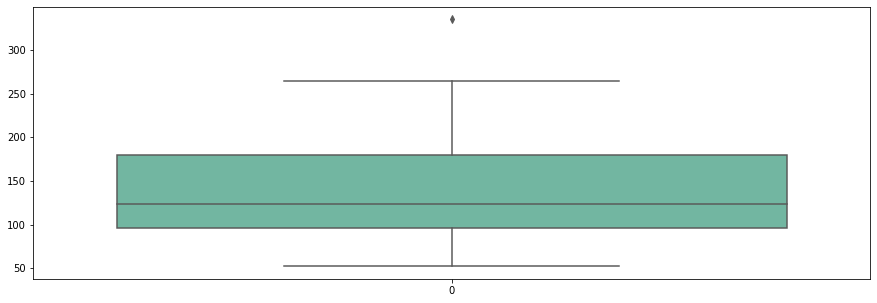

In [46]:
fig, (axes) = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

sns.boxplot(data=Horse_Power_data['Horse Power'],  palette='Set2');

Here We can see there is only one point outside the box so there is only one outlier lets check using IQR

In [47]:
Q1=Horse_Power_data['Horse Power'].quantile(0.25)

In [49]:
Q3=Horse_Power_data['Horse Power'].quantile(0.75)

In [50]:
IQR=Q3-Q1

In [51]:
IQR

83.5

In [52]:
low=Q1-1.5*IQR
high=Q3+1.5*IQR

In [53]:
print(low)
print(high)

-28.75
305.25


In [64]:
outlier=[]
i=0
for val in Horse_Power_data['Horse Power']:
    if val < low or val >high:
        outlier.append(val)
    i+=1
print(i,outlier)   

32 [335]


We can see there is only one outlier in the dataset now it is upto subject matter expert to check weather we should consider this outlier or not 


# Checking and Verifying outlier using Z-Score 

In [66]:
from scipy import stats

In [67]:
z = np.abs(stats.zscore(Horse_Power_data['Horse Power']))

In [69]:
z

array([0.54365487, 0.54365487, 0.7955699 , 0.54365487, 0.41954967,
       0.61774753, 1.45684686, 1.25494437, 0.76593284, 0.35101396,
       0.35101396, 0.49364233, 0.49364233, 0.49364233, 0.86410561,
       1.01229092, 1.23456889, 1.19567025, 1.40312969, 1.21048878,
       0.73629578, 0.04908639, 0.04908639, 1.45684686, 0.41954967,
       1.19567025, 0.82520696, 0.49919927, 1.73839896, 0.41954967,
       2.79051468, 0.5584734 ])

In [75]:
threshold = 1

result = np.where(z >= 2)
result

(array([30], dtype=int64),)

In [77]:
len(result[0]), len(result[0])

(1, 1)

In [79]:
outlier_df = pd.DataFrame(data=result[0], columns=['ROWNUM'])

outlier_df['COLNUM'] = result[0]
outlier_df.head()

,ROWNUM,COLNUM
0,30,30


In [82]:
Horse_Power_data['Horse Power'][30]

335

## Objective 2 Correlation for finding correlation we can use heatmap visulization

In [84]:
mt_data.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


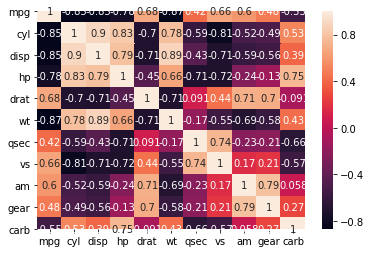

In [88]:
sns.heatmap( mt_data.corr(), annot=True );